## 기획자나 마케터가 되어 이벤트 댓글을 분석해 보자!
### 내가 만약 수백 수천개의 댓글을 다 읽어봐야 한다면?
### 댓글 속에 제품에 대한 관심을 빈도수로 추출해야 한다면?
* 쇼핑몰에서 제품 관련 이벤트 진행시 어떤 제품을 고객이 선호하는지 알고 싶다면?
* 고객 DB와 연계할 수 있다면 이벤트 혹은 마케팅 세그먼트로 활용해 볼 수도 있지 않을까?

### 향후 마케팅이나 전략을 어떻게 세워야 할까?

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline
# 시각화 결과가 선명하게 표시되도록
%config InlineBackend.figure_format = 'retina'

## 시각화를 위한 한글폰트 설정

In [2]:
# Window 한글폰트 설정
# plt.rc("font", family="Malgun Gothic")
# Mac 한글폰트 설정
plt.rc("font", family="AppleGothic")
plt.rc('axes', unicode_minus=False)

## 크롤링한 파일 로드하기

In [3]:
df = pd.read_csv("inflearn-event.csv")
df.shape

(1751, 1)

In [4]:
df.head()

,text
0,올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~
1,웹 개발자로 자리잡고 싶어 부족한 부분을 채우고 싶습니다.!\n\n#관심강의 : R...
2,2020년에는 자바 서버 개발자가 되기 위한 스프링 프레임워크를 제대로 배워보고 싶...
3,2020년에는 자바 서버 개발자가 되기 위한 스프링 프레임워크를 제대로 배워보고 싶...
4,웹 개발자인데 취미로 모바일 개발을 하고싶어요.\n#관심강의 : Flutter 입문...


In [5]:
df.tail()

,text
1746,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스..."
1747,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
1748,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
1749,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...
1750,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...


## 데이터 전처리

### 네트워크 오류 등으로 발생한 중복 입력 값을 제거
* 빈도 수 중복을 방지하기 위해

In [6]:
print(df.shape)
df = df.drop_duplicates(["text"], keep="last")
print(df.shape)

(1751, 1)
(1719, 1)


### 원본은 따로 보존

In [7]:
# 전처리 전에 원본을 보존하기 위해 복사해 둠
df["origin_text"] = df["text"]
df.head()

,text,origin_text
0,올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~,올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~
1,웹 개발자로 자리잡고 싶어 부족한 부분을 채우고 싶습니다.!\n\n#관심강의 : R...,웹 개발자로 자리잡고 싶어 부족한 부분을 채우고 싶습니다.!\n\n#관심강의 : R...
4,웹 개발자인데 취미로 모바일 개발을 하고싶어요.\n#관심강의 : Flutter 입문...,웹 개발자인데 취미로 모바일 개발을 하고싶어요.\n#관심강의 : Flutter 입문...
5,웹 개발에 필요한 지식과 스킬을 배우고 싶어요. 내년에 올 해를 돌아봤을 때 만족할...,웹 개발에 필요한 지식과 스킬을 배우고 싶어요. 내년에 올 해를 돌아봤을 때 만족할...
6,직장생활 3년차.. 아직 실력이 부족한 상태라 인프런 강의로 Skill UP!! 하...,직장생활 3년차.. 아직 실력이 부족한 상태라 인프런 강의로 Skill UP!! 하...


### 소문자 변환

In [8]:
# 파이썬은 대소문자를 구분하기 때문에 데이터 필터링을 위해 대문자를 모두 소문자로 변경
df["text"] = df["text"].str.lower()

In [9]:
# 같은 의미의 단어를 하나로 통일 예) python => 파이썬
df["text"] = df["text"].str.replace(
    "python", "파이썬").str.replace(
    "pandas", "판다스").str.replace(
    "javascript", "자바스크립트").str.replace(
    "java", "자바").str.replace(
    "react", "리액트")

### 텍스트로 관심 강의 분리

In [10]:
df["course"] = df["text"].apply(lambda x: x.split("관심강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강좌")[-1])
df["course"] = df["course"].str.replace(":", "")
df["course"].head()

0    올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~
1                 리액트로 nodebird sns 만들기
4      flutter 입문 - 안드로이드, ios 개발을 한 번에
5                             스프링 웹 mvc
6                   남박사의 파이썬 실전 100% 활용
Name: course, dtype: object

In [11]:
df[["text", "course"]].head()

,text,course
0,올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~,올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~
1,웹 개발자로 자리잡고 싶어 부족한 부분을 채우고 싶습니다.!\n\n#관심강의 : 리...,리액트로 nodebird sns 만들기
4,웹 개발자인데 취미로 모바일 개발을 하고싶어요.\n#관심강의 : flutter 입문...,"flutter 입문 - 안드로이드, ios 개발을 한 번에"
5,웹 개발에 필요한 지식과 스킬을 배우고 싶어요. 내년에 올 해를 돌아봤을 때 만족할...,스프링 웹 mvc
6,직장생활 3년차.. 아직 실력이 부족한 상태라 인프런 강의로 skill up!! 하...,남박사의 파이썬 실전 100% 활용


## 띄어 쓰기를 제거한 텍스트에서 키워드 추출
* TIOBE 프로그래밍 언어 순위 : [index | TIOBE - The Software Quality Company](https://www.tiobe.com/tiobe-index/?fbclid=IwAR34dJfgDHq2DK0C6X3g8IsUno2NhOiikMyxT6fw9SoyujFhy5FPvQogMoA)

In [12]:
search_keyword = ['머신러닝', '딥러닝', '파이썬', '판다스', '공공데이터',
                  'django', '크롤링', '시각화', '데이터분석', 
                  '웹개발', '엑셀', 'c', '자바', '자바스크립트', 
                  'node', 'vue', '리액트']

for keyword in search_keyword:
    df[keyword] = df["course"].str.contains(keyword)

In [13]:
df.head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~,올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~,올해는 열심히 공부해 보고 싶습니다. 모든 분들 파이팅입니다~,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,웹 개발자로 자리잡고 싶어 부족한 부분을 채우고 싶습니다.!\n\n#관심강의 : 리...,웹 개발자로 자리잡고 싶어 부족한 부분을 채우고 싶습니다.!\n\n#관심강의 : R...,리액트로 nodebird sns 만들기,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
4,웹 개발자인데 취미로 모바일 개발을 하고싶어요.\n#관심강의 : flutter 입문...,웹 개발자인데 취미로 모바일 개발을 하고싶어요.\n#관심강의 : Flutter 입문...,"flutter 입문 - 안드로이드, ios 개발을 한 번에",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,웹 개발에 필요한 지식과 스킬을 배우고 싶어요. 내년에 올 해를 돌아봤을 때 만족할...,웹 개발에 필요한 지식과 스킬을 배우고 싶어요. 내년에 올 해를 돌아봤을 때 만족할...,스프링 웹 mvc,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,직장생활 3년차.. 아직 실력이 부족한 상태라 인프런 강의로 skill up!! 하...,직장생활 3년차.. 아직 실력이 부족한 상태라 인프런 강의로 Skill UP!! 하...,남박사의 파이썬 실전 100% 활용,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df_python = df[df["text"].str.contains("파이썬|공공데이터|판다스")].copy()
df_python.shape

(309, 20)

In [15]:
True + True + False

2

In [16]:
df[search_keyword].sum().sort_values(ascending=False)

파이썬       289
c         276
자바        237
머신러닝      101
자바스크립트    101
리액트        96
vue        92
node       88
딥러닝        37
크롤링        35
django     26
웹개발        22
시각화        22
데이터분석      18
엑셀         15
공공데이터       4
판다스         4
dtype: int64

In [17]:
text = df.loc[(df["공공데이터"] == True), "text"]
for t in text:
    print("-"*20)
    print(t)

--------------------
2020년에는 데이터 분석쪽으로 이직하고 싶어요! 인프런 강의 듣고 이직에 성공하고 싶습니다!!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
경영학과 졸업생입니다. 새해엔 엑셀! 파이썬! 취직! 해내겠습니다. 좋은 강의, 커리큘럼이 있는 인프런 너무 감사합니다 ~^^
#관심강의: 공공데이터로 분석하기
--------------------
인프런으로 파이썬 기초문법부터 입문했어요! 실무 데이터분석에 활용할 수 있는 수준으로 실력을 올리고 싶습니다:)
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
나만의 프로젝트 하나 완성할 수 있을 정도의 지식 쌓기!
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기


## 판다스 단어가 들어가는 텍스트만 찾기
* 이미 str.contains 를 통해 판다스가 들어가는 텍스트에 대해 컬럼을 만들어 놨습니다. 이 값이  True 라면 판다스 강좌 입니다.

In [18]:
df.loc[df["판다스"] == True, "text"]

59           판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : 박조은 - 판다스
538       2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
1457    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
1667    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

## 빈도수 계산을 위한 텍스트 데이터 벡터화
* BOW 단어 가방에 단어를 토큰화 해서 담아줌

In [19]:
# 토큰화
"파이썬 데이터 분석".split()

['파이썬', '데이터', '분석']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(3, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(3, 6), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [21]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape

(1719, 1703)

In [22]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1703


['12개 만들면서 배우는',
 '12개 만들면서 배우는 ios',
 '12개 만들면서 배우는 ios 아이폰',
 '12개 만들면서 배우는 ios 아이폰 개발',
 '12개를 만들며 배우는',
 '12개를 만들며 배우는 swift4',
 '12개를 만들며 배우는 swift4 ios11',
 '12개를 만들며 배우는 swift4 ios11 아이폰',
 '2018 do it',
 '2018 do it 안드로이드']

In [23]:
# 각 리뷰마다 등장하는 단어에 빈도수가 표현됩니다. 0 은 등장하지 않음을 의미합니다.
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용1 애플리케이션 개발,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용1 애플리케이션 개발,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발
0,2,2,2,2,2,2,2,2,2,2,...,18,9,9,9,7,7,6,2,5,5


In [55]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬
df_freq.T.sort_values(by=0, ascending=False).head(30)

,0
홍정모의 따라하며 배우는,65
파이썬 머신러닝 완벽,44
머신러닝 완벽 가이드,44
스프링 데이터 jpa,43
파이썬 머신러닝 완벽 가이드,43
nodebird sns 만들기,38
관심있는 인프런 강의명,35
리액트로 nodebird sns,33
리액트로 nodebird sns 만들기,33
2020년 공부 목표,33


In [26]:
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["course", "freq"]
# 강의명을 토큰 3개로 중복제거하기 위해, 강좌명에서 지식공유자의 이름을 빈문자열로 변경
df_freq_T["course_find"] = df_freq_T["course"].str.replace("홍정모의", "")
df_freq_T["course_find"] = df_freq_T["course_find"].apply(lambda x : " ". join(x.split()[:4]))
df_freq_T.sort_values(["course_find", "freq"], ascending=False).head(10)

,course,freq,course_find
1702,활용한 리액트 native 개발,5,활용한 리액트 native 개발
1701,활용한 리액트 native,5,활용한 리액트 native
1700,활용한 데이터분석과 it보안,2,활용한 데이터분석과 it보안
1698,활용한 다양한 자동화 어플리케이션,7,활용한 다양한 자동화 어플리케이션
1699,활용한 다양한 자동화 어플리케이션 제작하기,6,활용한 다양한 자동화 어플리케이션
1697,활용한 다양한 자동화,7,활용한 다양한 자동화
1695,활용2 api 개발과 성능,9,활용2 api 개발과 성능
1696,활용2 api 개발과 성능 최적화,9,활용2 api 개발과 성능
1694,활용2 api 개발과,9,활용2 api 개발과
1693,활용1 애플리케이션 개발,18,활용1 애플리케이션 개발


In [27]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 첫 번째 강좌를 남기고 나머지 중복을 삭제
print(df_freq_T.shape)
df_course = df_freq_T.drop_duplicates(["course_find", "freq"], keep="first")
print(df_course.shape)

(1703, 3)
(1223, 3)


In [28]:
df_course = df_course.sort_values(by="freq", ascending=False)
df_course.head(20)

,course,freq,course_find
1676,홍정모의 따라하며 배우는,65,따라하며 배우는
1510,파이썬 머신러닝 완벽,44,파이썬 머신러닝 완벽
773,머신러닝 완벽 가이드,44,머신러닝 완벽 가이드
969,스프링 데이터 jpa,43,스프링 데이터 jpa
1511,파이썬 머신러닝 완벽 가이드,43,파이썬 머신러닝 완벽 가이드
237,nodebird sns 만들기,38,nodebird sns 만들기
516,관심있는 인프런 강의명,35,관심있는 인프런 강의명
741,리액트로 nodebird sns,33,리액트로 nodebird sns
742,리액트로 nodebird sns 만들기,33,리액트로 nodebird sns 만들기
11,2020년 공부 목표,33,2020년 공부 목표


In [29]:
df_course.to_csv("event-course-name-freq.csv")

## TF-IDF 로 가중치를 주어 벡터화
### TfidfTransformer()
* norm='l2' 각 문서의 피처 벡터를 어떻게 벡터 정규화 할지 정합니다.
    - L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이고 기본 값(유클리디안거리)
    - L1 : 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절(맨하탄거리)
* smooth_idf=False
    - 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정
* sublinear_tf=False
* use_idf=True
    - TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [31]:
%%time 
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

CPU times: user 3.32 ms, sys: 1.64 ms, total: 4.96 ms
Wall time: 5.91 ms


(1719, 1703)

In [32]:
feature_tfidf

<1719x1703 sparse matrix of type '<class 'numpy.float64'>'
	with 7995 stored elements in Compressed Sparse Row format>

In [33]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head() 

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용1 애플리케이션 개발,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(10)

,0
홍정모의 따라하며 배우는,40.076204
스프링 데이터 jpa,26.521119
파이썬 머신러닝 완벽,21.165001
머신러닝 완벽 가이드,20.890613
파이썬 머신러닝 완벽 가이드,20.264369
nodebird sns 만들기,17.932383
리액트로 nodebird sns 만들기,16.591469
리액트로 nodebird sns,16.591469
부트 개념과 활용,11.489913
관심있는 인프런 강의명,11.013100


In [35]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:30]:
    print(t)

홍정모의 따라하며 배우는
스프링 데이터 jpa
파이썬 머신러닝 완벽
머신러닝 완벽 가이드
파이썬 머신러닝 완벽 가이드
nodebird sns 만들기
리액트로 nodebird sns 만들기
리액트로 nodebird sns
부트 개념과 활용
관심있는 인프런 강의명
스프링 부트 개념과
함수형 프로그래밍과 자바스크립트
함수형 프로그래밍과 자바스크립트 es6
프로그래밍과 자바스크립트 es6
스프링 부트 개념과 활용
실전 스프링 데이터
2020년 공부 목표
대세는 쿠버네티스 기초편
실전 스프링 데이터 jpa
남박사의 파이썬 실전 100 활용
남박사의 파이썬 실전 100
남박사의 파이썬 실전
파이썬 실전 100
실전 100 활용
파이썬 실전 100 활용
파이썬 머신러닝 완벽가이드
rest api 개발
vue js 완벽
vue js 완벽 가이드
js 완벽 가이드


## 군집화 
* [Comparison of the K-Means and MiniBatchKMeans clustering algorithms — scikit-learn 0.22.1 documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html)
* cluster - MiniBatchKMeans

In [36]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 30
end = 70

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:59<00:00,  1.45s/it]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

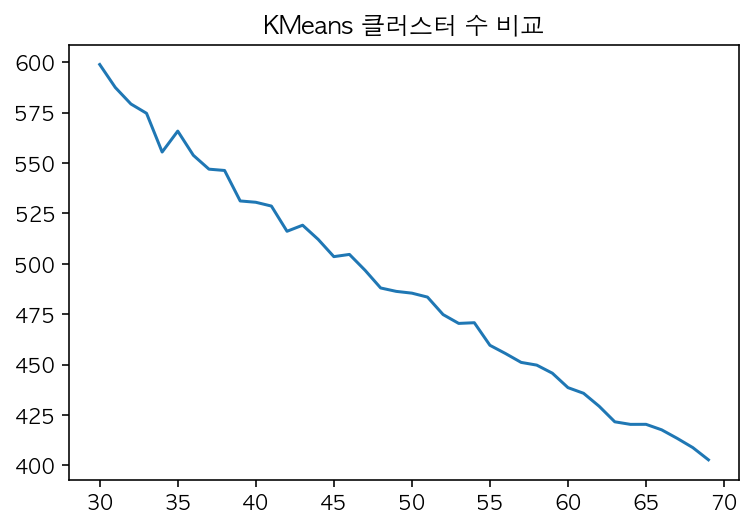

In [37]:
plt.plot(range(start, end), inertia)
plt.title("KMeans 클러스터 수 비교")

In [38]:
n_clusters = 50
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["cluster"] = prediction

In [39]:
df["cluster"].value_counts().head(10)

0     1195
3       38
1       32
6       29
20      22
25      22
11      21
15      20
19      19
2       18
Name: cluster, dtype: int64

In [40]:
# batch_size 를 쓸 수 있는 MiniBatchKMeans 로 군집화
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    b_inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:07<00:00,  5.17it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

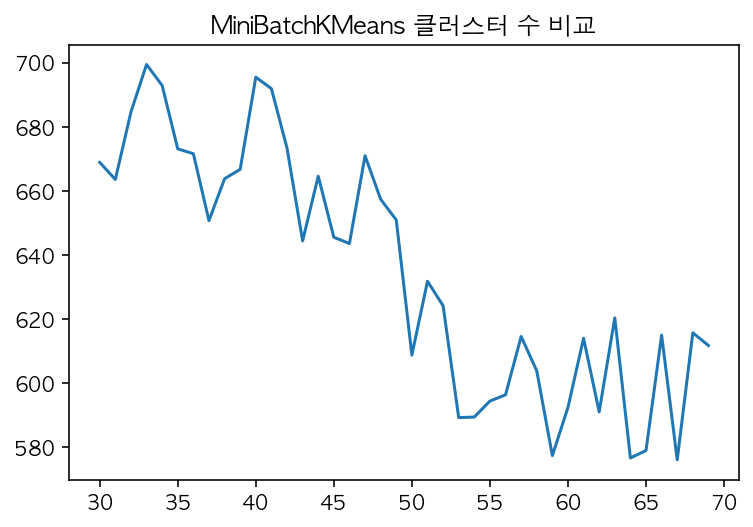

In [41]:
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [42]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["bcluster"] = prediction

In [43]:
df["bcluster"].value_counts().head(10)

42    818
1     278
13     41
8      41
6      38
12     32
24     27
35     22
17     22
21     20
Name: bcluster, dtype: int64

In [44]:
df.loc[df["bcluster"] == 21, "course"].value_counts().head(1)

  it 취업을 위한 알고리즘 입문 (with c++)  창의적 문제해결    10
Name: course, dtype: int64

In [45]:
df.loc[df["bcluster"] == 21, ["bcluster", "cluster", "course"]]

,bcluster,cluster,course
65,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
73,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
168,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
457,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
632,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
676,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
718,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
725,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
728,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결
733,21,11,it 취업을 위한 알고리즘 입문 (with c++) 창의적 문제해결.


In [46]:
df.loc[df["bcluster"] == 24, ["bcluster", "cluster", "origin_text", "course"]].tail(10)

,bcluster,cluster,origin_text,course
974,24,6,올해에 리엑트로 저만의 사이트를 만드는 것이 목표입니다.\n#관심강의:React로 ...,리액트로 nodebird sns 만들기
994,24,6,8년차 기획자인데 제가 기획했던 것들을 제 손으로 직접 만들어보고 싶습니다.\n# ...,"리액트로 nodebird sns 만들기, 웹게임을 만들며 배우는 리액트, 기타 생..."
1000,24,6,수강중인 강의 완강으로 실력 향상!!!\n#관심강의:React로 NodeBird S...,리액트로 nodebird sns 만들기
1274,24,6,"프론트, 백, 알고리즘 까지 아우르는 풀스택 개발자가 되어서 A-Z 까지 모든걸 다...",리액트로 nodebird sns 만들기
1350,24,6,리액트의 '리'자도 모르는 프런트 개발자입니다.\n이번 연도 리액트 마스터하고 싶습...,리액트로 nodebird sns 만들기
1530,24,6,올해는 노드환경에 능숙해지고 싶습니다.\n#관심강의: React로 NodeBird ...,리액트로 nodebird sns 만들기
1553,24,6,안녕하세요. 5년차 백엔드 개발자입니다.\n최근 React를 접하면서 프론트엔드 쪽...,리액트로 nodebird sns 만들기
1560,24,6,이제 막 입사한 파릇파릇한 개발자인데요 이참에 react에 대해서 제대로 공부하고 ...,리액트로 nodebird sns 만들기
1638,24,6,4학년이에요. 리액트를 공부하여 웹프로젝트를 해보고 좋은 곳에 취직하고 싶습니다.\...,리액트로 nodebird sns 만들기
1690,24,6,삼십대에 새로운 도전 하게되었습니다. 뒤늦게 시작하지만 풀스택 개발자가 꿈입니다.\...,리액트로 nodebird sns 만들기


### 클러스터 예측 정확도 확인하기

In [47]:
# n_clusters 위에서 정의한 클러스터 수를 사용
feature_array = feature_vector.toarray()
# 예측한 클러스터의 유니크 값
labels = np.unique(prediction)
df_cluster_score = []
df_cluster = []
for label in labels:
    id_temp = np.where(prediction==label) # 예측한 값이 클러스터 번호와 매치 되는 것을 가져옴
    x_means = np.mean(feature_array[id_temp], axis = 0) # 클러스터의 평균 값을 구함
    sorted_means = np.argsort(x_means)[::-1][:n_clusters] # 값을 역순으로 정렬해서 클러스터 수 만큼 가져옴
    features = vectorizer.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means] 
    # 클러스터별 전체 스코어
    df_score = pd.DataFrame(best_features, columns = ['features', 'score'])
    df_cluster_score.append(df_score)
    # 클러스터 대표 키워드
    df_cluster.append(best_features[0])

In [48]:
np.argsort(x_means)[::-1]

array([ 976,  975,  887, ..., 1140, 1141,    0])

In [54]:
# 개별 클러스터에서 점수가 가장 높은 단어를 추출 아래 점수가 클수록 예측 정확도가 높음
# MiniBatchKMeans 로 예측한 값 기준
pd.DataFrame(df_cluster, columns = ['features', 'score']).sort_values(by=["features", "score"], ascending=False)

,features,score
28,홍정모의 따라하며 배우는,1.411765
12,홍정모의 따라하며 배우는,1.000000
5,함수형 프로그래밍과 자바스크립트 es6,1.000000
32,프로그래밍과 자바스크립트 es6,2.000000
3,프로그래밍 시작하기 파이썬 입문,1.000000
33,파이썬입문과 크롤링기초 부트캠프,1.000000
40,파이썬 머신러닝 완전정복 마라톤 기록예측,0.250000
27,파이썬 머신러닝 완벽가이드,1.000000
6,파이썬 머신러닝 완벽,1.000000
46,파이썬 데이터시각화 분석,1.000000


In [56]:
# 정확도가 1이 나온 클러스터를 찾아봄 - 같은 강좌끼리 묶였는지 확인 함
df.loc[df["bcluster"] == 32, ["bcluster", "cluster", "origin_text", "course"]]

,bcluster,cluster,origin_text,course
401,32,25,올해는 꼭 함수형 자바스크립트를 실무에 도입하고 싶습니다.\n#관심강의 - 함수형 ...,"- 함수형 프로그래밍과 자바스크립트 es6+, 함수형 프로그래밍과 자바스크립트 e..."
911,32,25,#2020년 공부 목표\n2020년 공부 목표는 국비학원을 다니면서 남는 시간에 자...,#2020년 공부 목표\n2020년 공부 목표는 국비학원을 다니면서 남는 시간에 자...
1514,32,25,"#JS, 함수형 프로그래밍에 친근해 지고 싶어요!\n#함수형 프로그래밍과 JavaS...","#js, 함수형 프로그래밍에 친근해 지고 싶어요!\n#함수형 프로그래밍과 자바스크립..."


## WordCloud
* [amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)
* 설치 방법 : [Wordcloud :: Anaconda Cloud](https://anaconda.org/conda-forge/wordcloud)

In [51]:
from wordcloud import WordCloud

# 불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트
stopwords = ["관심 강의", "관심강의", "관심", "강의", "강좌", "강의를",
             "올해", "올해는", "열심히", "공부를", "합니다", "하고", "싶어요", 
             "있는", "있습니다", "싶습니다", "2020년"]
# 불용어를 제거하지 않고 그리려면 아래 주석을 풀어서 stopword 변수에 덮어쓰기를 합니다.
# stopwords = []
def displayWordCloud(data = None, backgroundcolor = 'black', width=1280, height=768):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = stopwords, 
                        background_color = backgroundcolor, 
                        width = width, height = height, 
                        random_state=42).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

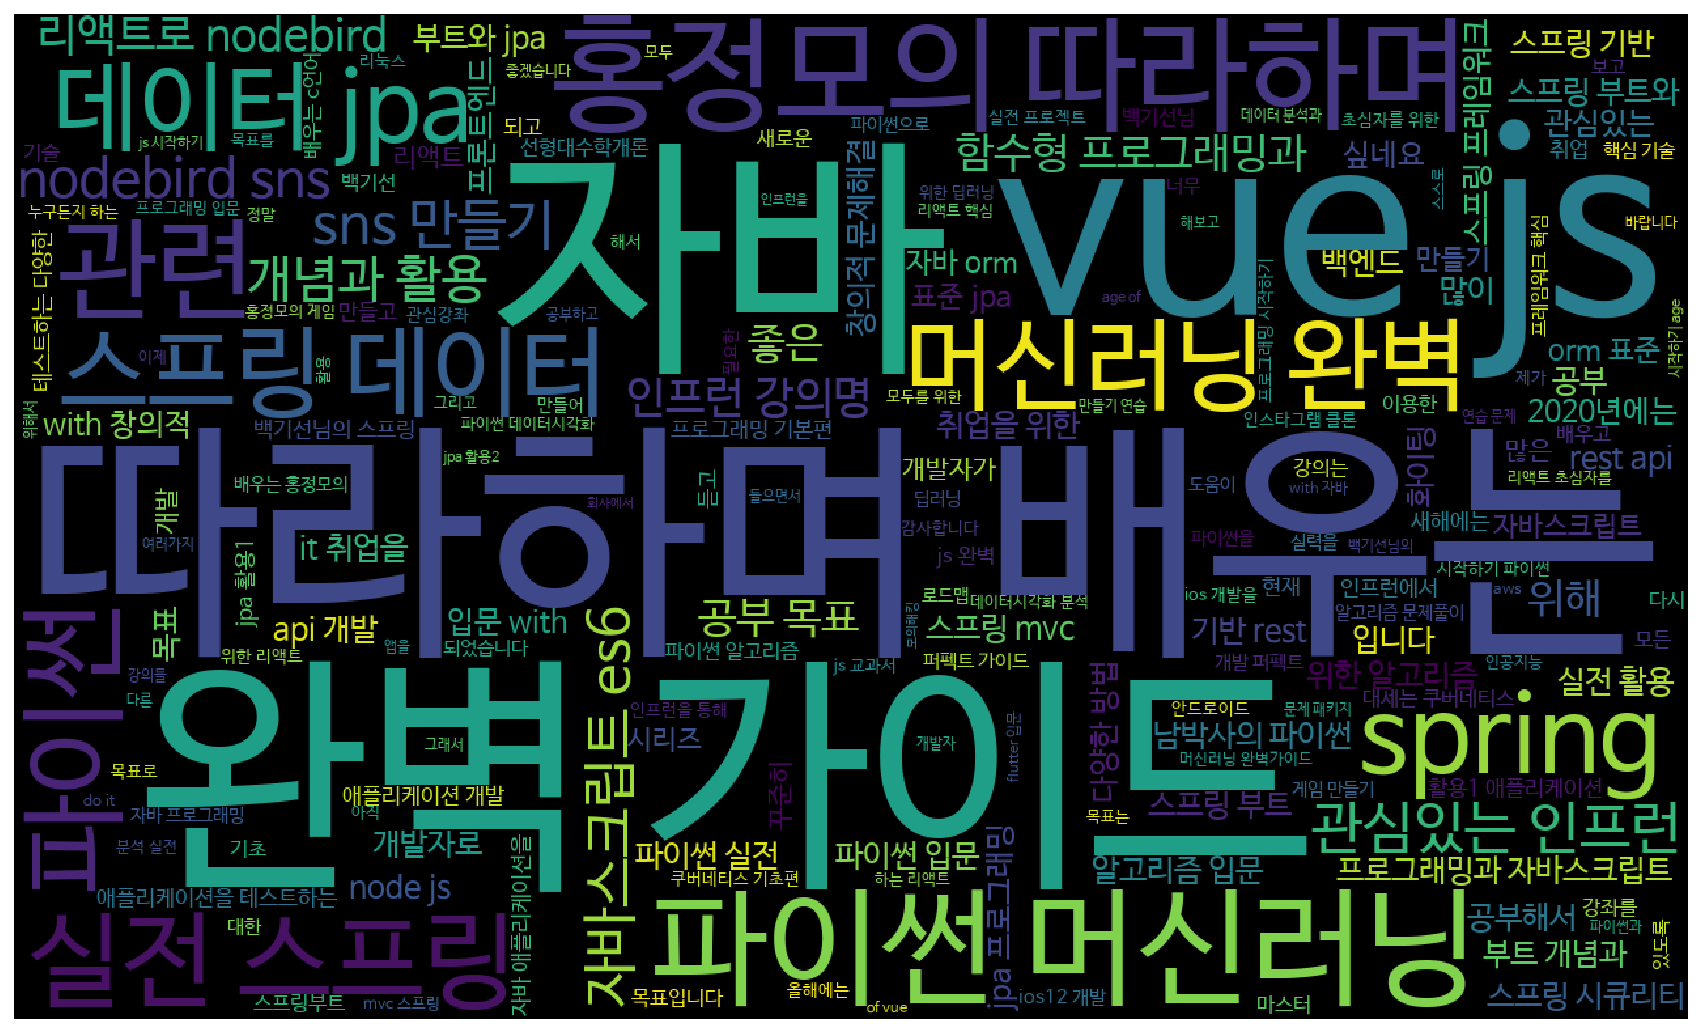

In [52]:
course_text = " ".join(df["course"])
displayWordCloud(course_text)